### Descripción del dataset y contexto

Los precios de los billetes de tren varían en los trenes de alta velocidad (AVE) de Renfe en función de la demanda. Este dataset contiene datos de precios de billetes de AVE para distintas fechas, distintos trayectos, sus duraciones, clase, tipo de billete y tipo de tren entre otros. Nuestro cliente quiere poder predecir el precio del billete en función de las variables presentes en el dataset. 


Para ello, lo primero que debes hacer es realizar un análisis exploratorio de los datos (EDA). Qué puedes observar en estos datos? Hay diferencias de precio según el tipo de trayecto? Y según el tipo de tren? Qué conclusiones podemos sacar? Será posible crear con estos datos un modelo predictivo? Analiza las variables pensando en el valor que le puedes aportar al cliente con este análisis.


Las columnas son:

1.- **insert_date**: fecha y hora de registro del precio para ese trayecto  
2.- **origin**: ciudad de origen  
3.- **destination**: ciudad de destino  
4.- **start_date**: fecha y hora de inicio del trayecto  
5.- **end_date**: fecha y hora del final del trayecto  
6.- **train_type**: tipo de tren  
7.- **price**: precio del billete para la fecha insert_date  
8.- **train_class**: clase del billete  
9.- **fare**: tipo de trayecto y billete  



### Importamos las librerias que vamos a utilizar:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargamos el dataset

In [2]:
file_path = 'tiquets_renfe.csv'
data = pd.read_csv(file_path)

### Análisis descriptivo y visualización de datos

Mostramos las primeras filas del dataset para entender la estructura de los datos:

In [3]:
data.head(10)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-28 19:19:35,BARCELONA,MADRID,2019-05-19 07:05:00,2019-05-19 09:50:00,AVE,66.75,Turista,Promo
1,2019-05-03 17:21:03,BARCELONA,MADRID,2019-05-28 11:00:00,2019-05-28 13:45:00,AVE,107.70,Turista,Flexible
2,2019-05-09 09:13:47,BARCELONA,MADRID,2019-06-25 14:00:00,2019-06-25 17:10:00,AVE,49.55,Turista,Promo
3,2019-05-03 11:09:11,MADRID,BARCELONA,2019-05-07 07:15:00,2019-05-07 16:37:00,R. EXPRES,43.25,Turista,Adulto ida
4,2019-05-03 15:42:41,MADRID,SEVILLA,2019-05-05 08:30:00,2019-05-05 11:14:00,ALVIA,67.20,Turista,Flexible
5,2019-04-16 07:30:21,BARCELONA,MADRID,2019-05-27 18:25:00,2019-05-27 20:55:00,AVE,82.35,Turista Plus,Promo
6,2019-04-19 14:04:58,MADRID,VALENCIA,2019-05-12 16:55:00,2019-05-12 21:58:00,AVE-LD,56.10,Turista con enlace,Flexible
7,2019-04-20 15:10:46,BARCELONA,MADRID,2019-05-12 07:05:00,2019-05-12 09:50:00,AVE,66.75,Turista,Promo
8,2019-04-25 09:14:58,MADRID,BARCELONA,2019-05-23 17:00:00,2019-05-23 19:30:00,AVE,94.55,Turista Plus,Promo
9,2019-04-23 11:29:29,SEVILLA,MADRID,2019-05-31 11:45:00,2019-05-31 14:17:00,AVE,69.40,Preferente,Promo


In [4]:
data.tail(10)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
499990,2019-05-05 01:30:51,MADRID,VALENCIA,2019-05-08 20:40:00,2019-05-08 22:24:00,AVE,45.30,Turista,Promo
499991,2019-04-20 05:26:28,SEVILLA,MADRID,2019-05-18 07:00:00,2019-05-18 10:02:00,AV City,49.15,Turista,Promo
499992,2019-04-17 07:39:59,MADRID,BARCELONA,2019-04-25 09:30:00,2019-04-25 12:34:00,AVE,102.15,Turista Plus,Promo
499993,2019-04-30 01:14:56,MADRID,SEVILLA,2019-05-24 06:20:00,2019-05-24 09:16:00,AV City,43.55,Turista,Promo
499994,2019-05-09 05:08:08,MADRID,SEVILLA,2019-05-31 14:00:00,2019-05-31 16:32:00,AVE,89.95,Preferente,Promo
499995,2019-04-16 04:35:00,MADRID,SEVILLA,2019-05-31 21:25:00,2019-06-01 00:10:00,AV City,49.15,Turista,Promo
499996,2019-04-17 17:01:18,MADRID,SEVILLA,2019-05-28 13:00:00,2019-05-28 15:40:00,AVE,47.30,Turista,Promo
499997,2019-04-23 18:16:48,MADRID,BARCELONA,2019-05-22 15:00:00,2019-05-22 17:30:00,AVE,88.95,Turista,Promo
499998,2019-04-13 13:20:39,MADRID,VALENCIA,2019-05-05 18:40:00,2019-05-05 20:20:00,AVE,73.10,Turista,Flexible
499999,2019-04-21 04:55:49,BARCELONA,MADRID,2019-05-12 09:03:00,2019-05-12 18:07:00,R. EXPRES,43.25,Turista,Adulto ida


**Observaciones**: Vemos que es un dataset con varias variables categóricas ( origin, destination, train_type, train_class y fare) para hacer analisis, nos será complicado, para ello necesitamos un onehot encoding que realizaremos más adelante. También vemos que tenemos 3 variables numéricas, debemos comprobar más adelante si están en formato datatime.

Comprobamos el número de filas y columnas que tiene nuestro dataset

In [5]:
data.shape

(500000, 9)

Comprobamos que no exista ningún valor NaN o nulo. Observamos que NO hay ninguno.

In [6]:
data.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

Comprobamos la tipologia de los datos que tiene cada columna

In [7]:
data.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

Observamos que todas las columnas excepto price son tipo objeto, es decir, tipo texto. Y tenemos 3 columnas que son las fechas y horas, a continuación vamos a convertirlas a formato datatime.

### Convertimos la variable insert_date a formato de fecha y hora

Esto nos permitirá un manejo más conveniente para realizar operaciones temporales y análisis basados en tiempo.

In [8]:
data['insert_date'] = pd.to_datetime(data['insert_date'])

Como tenemos en la misma columna, fecha y hora, lo que vamos a realizar a continuación es hacer una extracción de componentes temporales. 

### Extracción de componentes temporales:

Esto nos puede ser útil para analizar tendencias según el año, mes, día o hora en que se registró el precio del billete. También nos puede ayudar a encontrar patrones estacionales o variaciones en diferentes momentos del día.

In [9]:
data['insert_date_year'] = data['insert_date'].dt.year
data['insert_date_month'] = data['insert_date'].dt.month
data['insert_date_day'] = data['insert_date'].dt.day
data['insert_date_hour'] = data['insert_date'].dt.hour

In [10]:
data['start_date'] = pd.to_datetime(data['start_date'])

In [11]:
data['start_date_year'] = data['start_date'].dt.year
data['start_date_month'] = data['start_date'].dt.month
data['start_date_day'] = data['start_date'].dt.day
data['start_date_hour'] = data['start_date'].dt.hour

In [12]:
data['end_date'] = pd.to_datetime(data['end_date'])

In [13]:
data['end_date_year'] = data['end_date'].dt.year
data['end_date_month'] = data['end_date'].dt.month
data['end_date_day'] = data['end_date'].dt.day
data['end_date_hour'] = data['end_date'].dt.hour

### Imputamos valores faltantes

Imputamos valores utilizando técnicas como rellenar hacia adelante ('ffill') si los datos faltantes son pocos y tienen una relación temporal.

In [14]:
data['insert_date'].fillna(method='ffill', inplace=True)

In [15]:
data['start_date'].fillna(method='ffill', inplace=True)

In [16]:
data['end_date'].fillna(method='ffill', inplace=True)

### analizamos las variables categoricas

In [17]:
data['origin'].unique()

array(['BARCELONA', 'MADRID', 'SEVILLA', 'VALENCIA', 'PONFERRADA'],
      dtype=object)

In [18]:
data['destination'].unique()

array(['MADRID', 'BARCELONA', 'SEVILLA', 'VALENCIA', 'PONFERRADA'],
      dtype=object)

In [19]:
data['train_type'].unique()

array(['AVE', 'R. EXPRES', 'ALVIA', 'AVE-LD', 'AV City', 'MD',
       'INTERCITY', 'AVE-MD', 'AVE-TGV', 'REGIONAL', 'MD-LD', 'TRENHOTEL',
       'MD-AVE', 'LD', 'LD-MD'], dtype=object)

In [20]:
data['train_class'].unique()

array(['Turista', 'Turista Plus', 'Turista con enlace', 'Preferente',
       'Cama Turista', 'Cama G. Clase'], dtype=object)

In [21]:
data['fare'].unique()

array(['Promo', 'Flexible', 'Adulto ida', 'Promo +',
       'Individual-Flexible', 'Mesa', 'Grupos Ida'], dtype=object)

### One-Hot Encoding

Realizamos un One-Hot Encoding en todas las variables categóricas, para poder realizar un análisis de correlación.

Convertimos estas variables en representaciones numéricas binarias (0 o 1) mediante la creación de variables ficticias (dummy variables) para cada categoría única en la columna original.

In [22]:
train_class_encoded = pd.get_dummies(data['train_class'], prefix='train_class')
data = pd.concat([data, train_class_encoded], axis=1)

In [23]:
fare_encoded = pd.get_dummies(data['fare'], prefix='fare')
data = pd.concat([data, fare_encoded], axis=1)

In [24]:
origin_encoded = pd.get_dummies(data['origin'], prefix='origin')
data = pd.concat([data, origin_encoded], axis=1)

In [25]:
destination_encoded = pd.get_dummies(data['destination'], prefix='destination')
data = pd.concat([data, destination_encoded], axis=1)

In [26]:
train_type_encoded = pd.get_dummies(data['train_type'], prefix='train_type')
data = pd.concat([data, train_type_encoded], axis=1)

Realizamos un print para visualizar como ha quedado nuestro dataset con los cambios. **Observamos** que ahora nuestro data set a pasado de tener 9 columnas a 59, por el one hot encoding.

In [27]:
data

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,insert_date_year,...,train_type_AVE-TGV,train_type_INTERCITY,train_type_LD,train_type_LD-MD,train_type_MD,train_type_MD-AVE,train_type_MD-LD,train_type_R. EXPRES,train_type_REGIONAL,train_type_TRENHOTEL
0,2019-04-28 19:19:35,BARCELONA,MADRID,2019-05-19 07:05:00,2019-05-19 09:50:00,AVE,66.75,Turista,Promo,2019,...,False,False,False,False,False,False,False,False,False,False
1,2019-05-03 17:21:03,BARCELONA,MADRID,2019-05-28 11:00:00,2019-05-28 13:45:00,AVE,107.70,Turista,Flexible,2019,...,False,False,False,False,False,False,False,False,False,False
2,2019-05-09 09:13:47,BARCELONA,MADRID,2019-06-25 14:00:00,2019-06-25 17:10:00,AVE,49.55,Turista,Promo,2019,...,False,False,False,False,False,False,False,False,False,False
3,2019-05-03 11:09:11,MADRID,BARCELONA,2019-05-07 07:15:00,2019-05-07 16:37:00,R. EXPRES,43.25,Turista,Adulto ida,2019,...,False,False,False,False,False,False,False,True,False,False
4,2019-05-03 15:42:41,MADRID,SEVILLA,2019-05-05 08:30:00,2019-05-05 11:14:00,ALVIA,67.20,Turista,Flexible,2019,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2019-04-16 04:35:00,MADRID,SEVILLA,2019-05-31 21:25:00,2019-06-01 00:10:00,AV City,49.15,Turista,Promo,2019,...,False,False,False,False,False,False,False,False,False,False
499996,2019-04-17 17:01:18,MADRID,SEVILLA,2019-05-28 13:00:00,2019-05-28 15:40:00,AVE,47.30,Turista,Promo,2019,...,False,False,False,False,False,False,False,False,False,False
499997,2019-04-23 18:16:48,MADRID,BARCELONA,2019-05-22 15:00:00,2019-05-22 17:30:00,AVE,88.95,Turista,Promo,2019,...,False,False,False,False,False,False,False,False,False,False
499998,2019-04-13 13:20:39,MADRID,VALENCIA,2019-05-05 18:40:00,2019-05-05 20:20:00,AVE,73.10,Turista,Flexible,2019,...,False,False,False,False,False,False,False,False,False,False


Ahora ya podemos realizar los analisis correspondientes, teniendo todas las variables categóricas en dummy variables.

### Análisis estadístico y visualización

In [28]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
insert_date,500000,2019-04-23 14:29:40.988690176,2019-04-11 21:49:46,2019-04-17 10:32:12,2019-04-21 23:43:43.500000,2019-04-28 23:13:14,2019-05-09 21:19:16,NaN
start_date,500000,2019-05-15 21:34:42.728760320,2019-04-12 05:50:00,2019-05-05 14:40:00,2019-05-15 19:00:00,2019-05-26 07:30:00,2019-07-07 22:14:00,NaN
end_date,500000,2019-05-16 00:43:07.690319616,2019-04-12 08:38:00,2019-05-05 17:45:00,2019-05-15 21:59:00,2019-05-26 10:40:00,2019-07-08 04:31:00,NaN
price,500000.0,63.406276,15.45,43.75,60.3,78.8,214.2,25.768341
insert_date_year,500000.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,0.0
insert_date_month,500000.0,4.202968,4.0,4.0,4.0,4.0,5.0,0.402209
insert_date_day,500000.0,17.013268,1.0,14.0,18.0,22.0,30.0,7.395122
insert_date_hour,500000.0,11.652446,0.0,6.0,11.0,17.0,23.0,6.858625
start_date_year,500000.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,0.0
start_date_month,500000.0,4.929764,4.0,5.0,5.0,5.0,7.0,0.535581


### Análisis de correlación 

Para crear una matriz de correlación sin considerar las columnas especificadas ('origin', 'destination', 'train_type', 'train_class', 'fare'),que son las que nos están dando error, lo que vamos a realizar es seleccionar las columnas relevantes y luego calcular la matriz de correlación. 

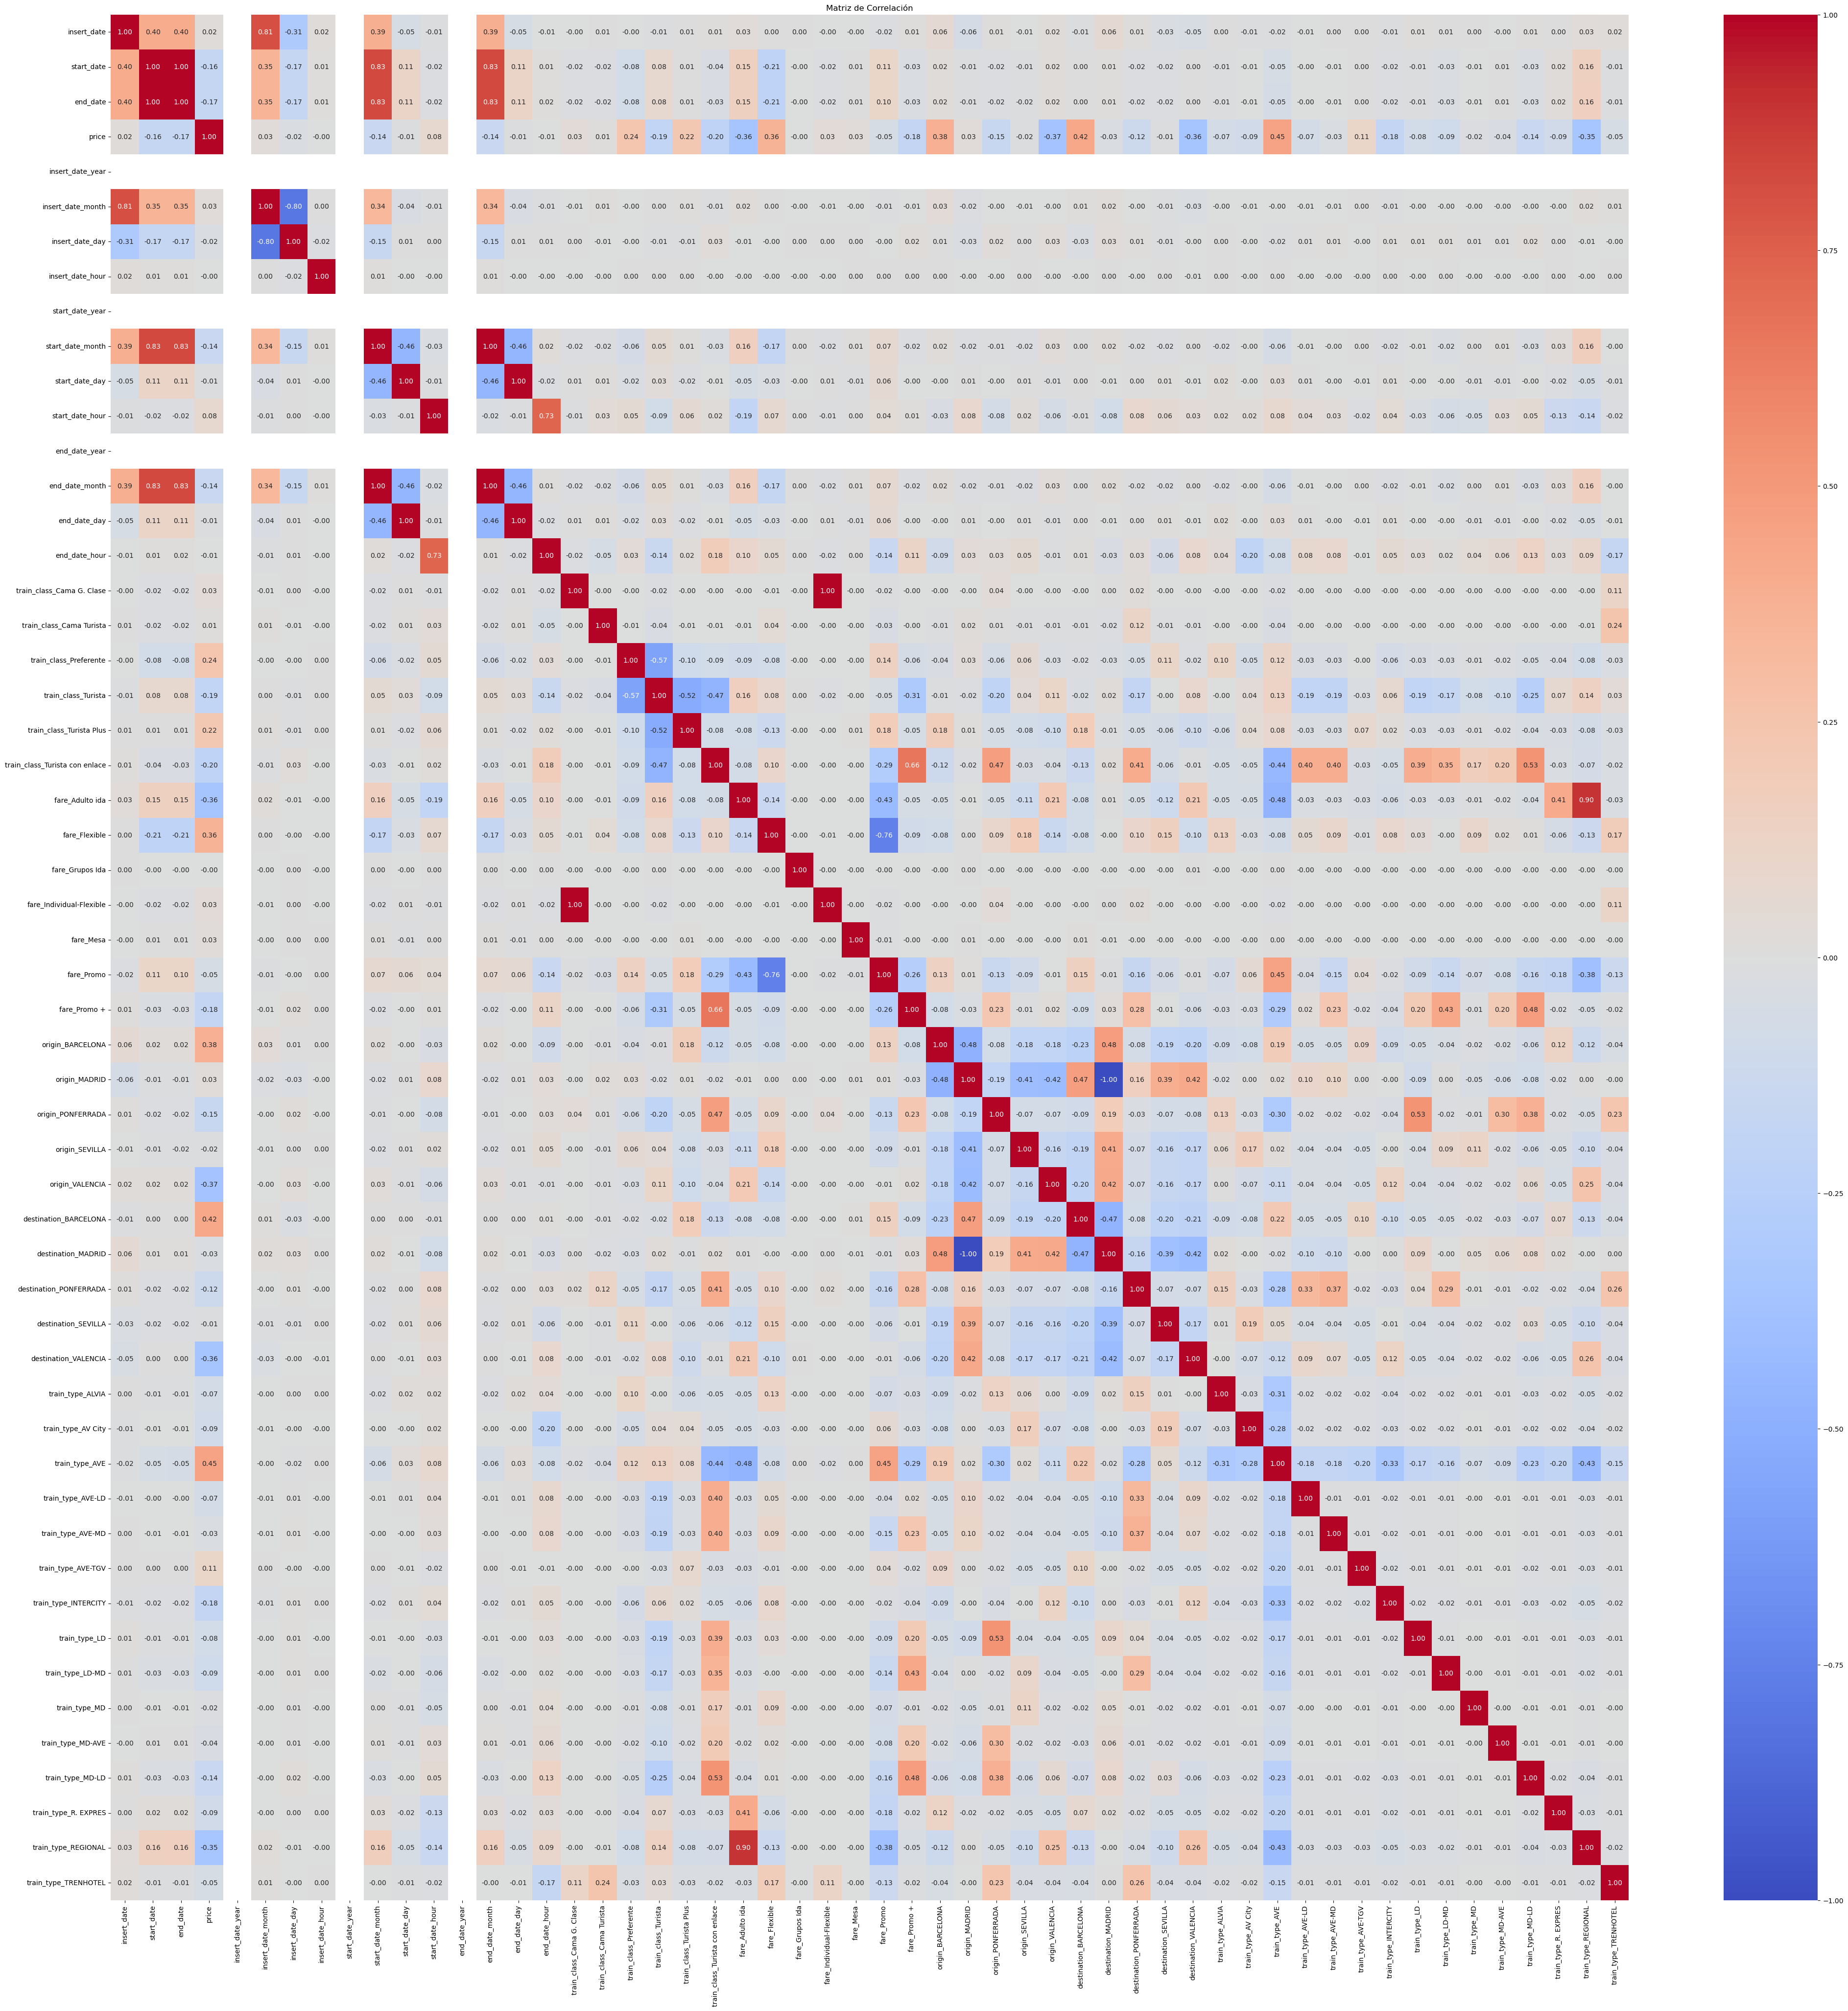

In [29]:
# Seleccionar las columnas para la matriz de correlación
relevant_columns = [col for col in data.columns if col not in ['origin', 'destination', 'train_type', 'train_class', 'fare']]

# Crear un nuevo DataFrame con las columnas relevantes
relevant_data = data[relevant_columns]

# Calcular la matriz de correlación
correlation_matrix = relevant_data.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


**Observaciones:** Como no podemos ver de forma clara la correlación entre variables, vamos a aplicar un filtro para visualizar aquellas variables que tengan una correlación alta.

In [30]:
correlation_matrix = relevant_data.corr()

high_correlation = correlation_matrix[((correlation_matrix > 0.85) & (correlation_matrix < 1)) | ((correlation_matrix < -0.85) & (correlation_matrix > -1))]
high_correlation_pairs = high_correlation.stack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']
print(high_correlation_pairs)

            Variable 1           Variable 2  Correlación
0           start_date             end_date     0.999989
1             end_date           start_date     0.999989
2     start_date_month       end_date_month     0.998900
3       start_date_day         end_date_day     0.996535
4       end_date_month     start_date_month     0.998900
5         end_date_day       start_date_day     0.996535
6      fare_Adulto ida  train_type_REGIONAL     0.899280
7  train_type_REGIONAL      fare_Adulto ida     0.899280


Vamos a crear un heatmap para visualizar las correlaciones destacadas

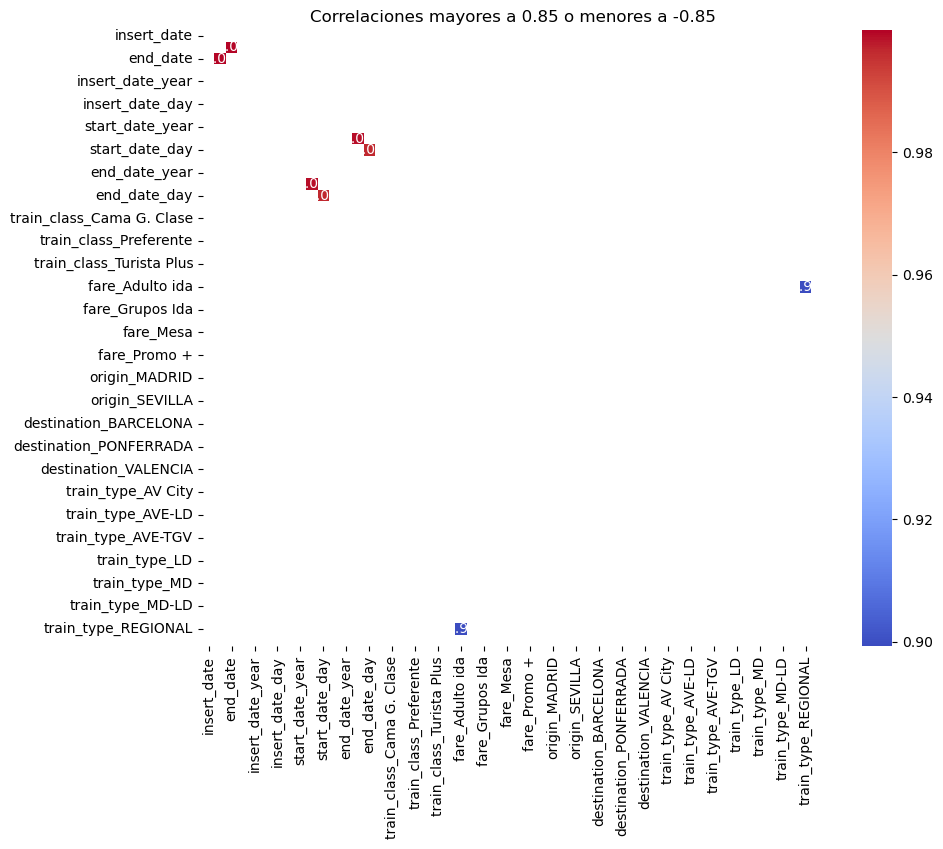

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones mayores a 0.85 o menores a -0.85')
plt.show()

**Observamos** ponemos foco especialmente a las variables fare_Adulto ida Y train_type_REGIONAL que son las que mayor correlación tiene. Vamos a analizarlas.

## Gráfico de precios por tipo de trayecto y billete

Comprobamos los datos de la columna 'fare_Adulto ida', como son valores booleanos, aplicamos el código value_counts() y a la hora de hacer las visualizaciones nos puede dar problemas.

In [32]:
data['fare_Adulto ida'].value_counts()

fare_Adulto ida
False    462256
True      37744
Name: count, dtype: int64

Como tenemos los datos categóricos en booleano, lo que vamos a hacer es utilizar el dataframe original y seleccionar solo las columnas que representan las variables 'fare' para realizar la visualización.

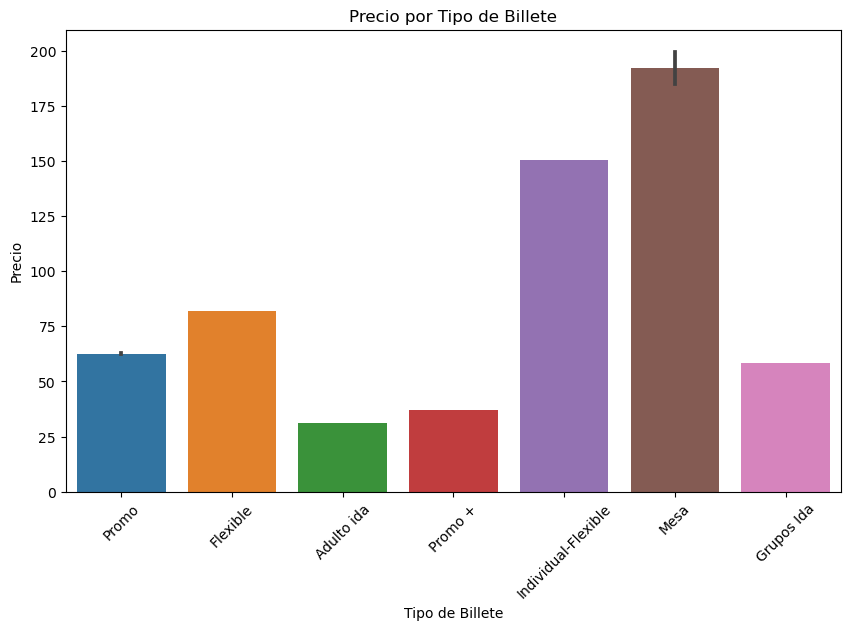

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fare', y='price', data=data)
plt.title('Precio por Tipo de Billete')
plt.xlabel('Tipo de Billete')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

**Observamos** que el precio del billete de Adulto de Ida es el más económico. Y el más caro es el de mesa. A continuación vamos a ver si tiene relación con el tipo de tren.

## Gráfico de barras Relación entre el tipo de billete y el Tipo de tren.

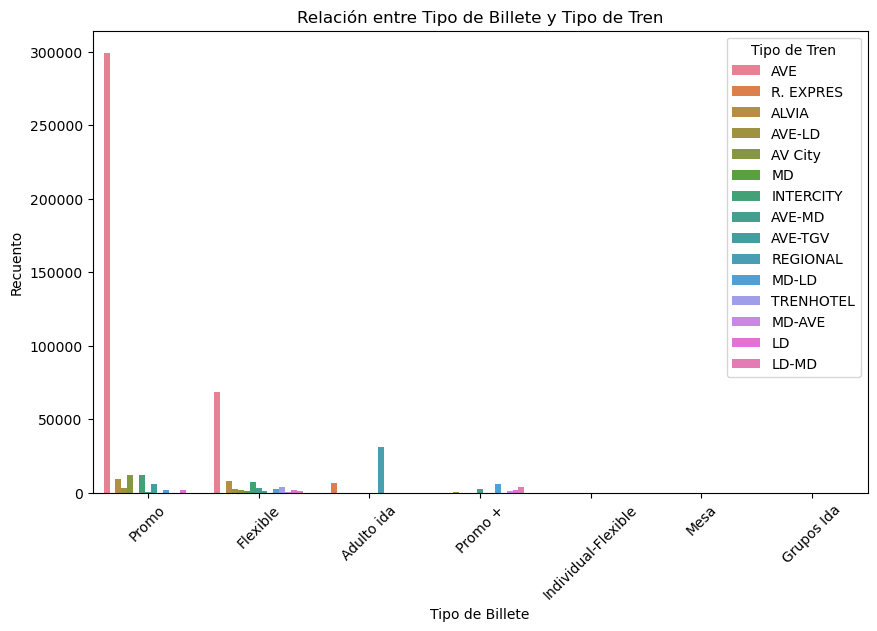

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fare', hue='train_type', data=data, palette='husl')
plt.title('Relación entre Tipo de Billete y Tipo de Tren')
plt.xlabel('Tipo de Billete')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Tren')
plt.show()

**Observamos** que el billete Adulto ida es económico por que es del tren Regional, tal y como nos indicaba nuestra matríz de coorrelación. Pero el más vendido es el billete Promo con el tren Ave.

### Calculamos la duración del trayeto

Esto calcula la duración del trayecto en segundos restando las fechas de inicio y fin. 

In [35]:
data['travel_duration'] = (data['end_date'] - data['start_date']).dt.total_seconds()

## Gráfico de dispersión entre duración del trayecto y precio del billete

Realizamos un primer análisis, para saber si la duración del trayecto tiene alguna influencia en el precio del billete.

In [36]:
# Convertir 'start_date' y 'end_date' al formato datetime si no están en ese formato
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])

# Calcular la duración del trayecto restando las horas de llegada y salida
data['duration'] = (data['end_date'] - data['start_date']).dt.total_seconds() / 3600  # Duración en horas

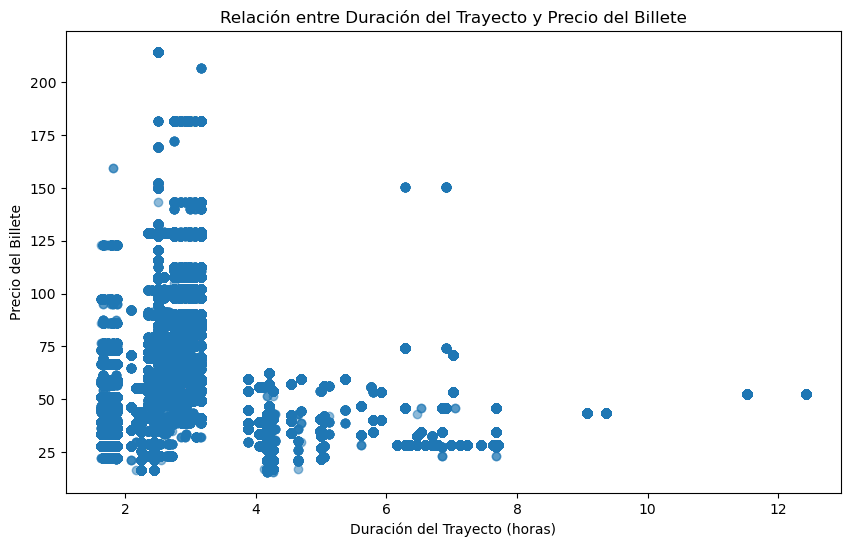

In [37]:
# Graficar la relación entre la duración del trayecto y el precio del billete
plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['price'], alpha=0.5)
plt.title('Relación entre Duración del Trayecto y Precio del Billete')
plt.xlabel('Duración del Trayecto (horas)')
plt.ylabel('Precio del Billete')
plt.show()

Observamos en el gráfico de dispersión, que contra más duración menor precio es el billete, también es cierto que donde más se aglutina son en los precios más bajos de 100€. Teniendo en cuenta los datos anteriores, puedo interpretar que, los precios más altos son de billetes de Mesa y de Individual+Flexible.

### Análisis de estadísticas descriptivas por tipo de billete

A continuación vamos a analizar que billetes son los más vendidos vs la duración del trayecto.

In [38]:
duration_by_fare = data.groupby('fare')['travel_duration'].describe()
print(duration_by_fare)

                        count          mean          std      min      25%  \
fare                                                                         
Adulto ida            37744.0  26697.178359  3417.662826  22200.0  24180.0   
Flexible             101966.0  11288.839417  5334.803528   5880.0   9000.0   
Grupos Ida                3.0   6180.000000   311.769145   6000.0   6000.0   
Individual-Flexible      51.0  24229.411765  1049.208105  22620.0  22620.0   
Mesa                     19.0  10768.421053   760.885910   9900.0   9900.0   
Promo                345257.0   9199.515028  2265.381935   5880.0   7980.0   
Promo +               14960.0  21128.935829  4515.889993   9000.0  16320.0   

                         50%      75%      max  
fare                                            
Adulto ida           25680.0  27720.0  33720.0  
Flexible              9480.0  11400.0  44700.0  
Grupos Ida            6000.0   6270.0   6540.0  
Individual-Flexible  24900.0  24900.0  24900.0  
Mes

Vamos a ordenar los valores fare por conteo en orden descendetene, para ello vamos a crear un DataFrame adicional y lo ordenamos.

In [39]:
count_by_fare = duration_by_fare['count'].reset_index()
count_by_fare = count_by_fare.sort_values(by='count', ascending=False)

print(count_by_fare)

                  fare     count
5                Promo  345257.0
1             Flexible  101966.0
0           Adulto ida   37744.0
6              Promo +   14960.0
3  Individual-Flexible      51.0
4                 Mesa      19.0
2           Grupos Ida       3.0


**Conclusiones**: Corroboramos que el billete más vendido es el PROMO seguido por el Flexible y en tercer lugar el Adulto Ida. Ahora vamos a analizar la duración del trayecto según el tipo de billete.

### primero pasamos los valores de duración de tiempo en horas.

In [40]:
data['travel_duration_hours'] = data['travel_duration'] / 3600

## Gráfica de boxplot Duración del Trayecto por tipo de billete

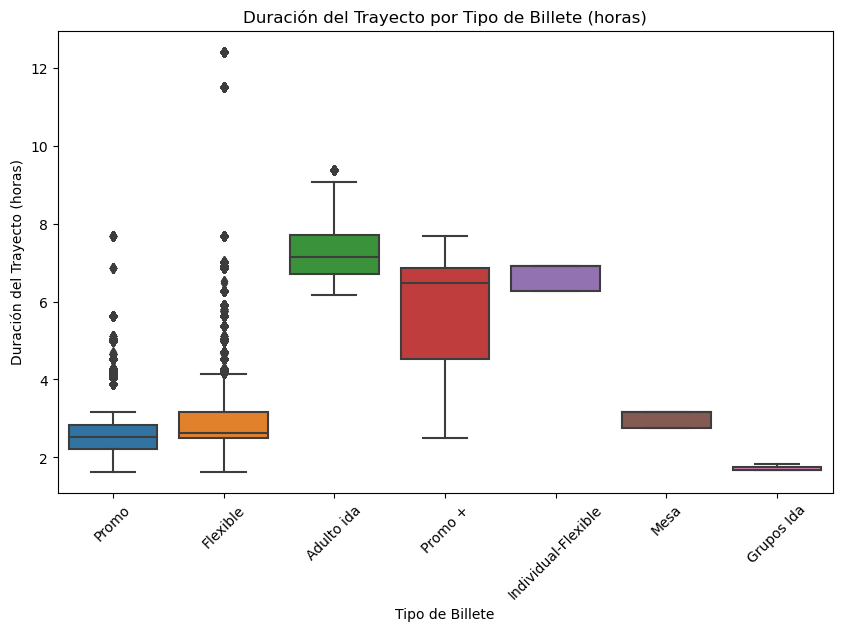

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fare', y='travel_duration_hours')
plt.title('Duración del Trayecto por Tipo de Billete (horas)')
plt.xlabel('Tipo de Billete')
plt.ylabel('Duración del Trayecto (horas)')
plt.xticks(rotation=45)
plt.show()

**Observaciones**: vemos que los billetes Promo y Flexible son lo que menos duración en tiempo tiene, en cambio el billete Adulto ida, existe una diferencia importante, en cuanto tiempo. Con estos datos, nos encaja que el  billete mesa es caro, y va dentro del grupo de duración de trayecto más corto.

### Ahora vamos a visulalizar los datos en minutos

In [42]:
data['travel_duration_minutes'] = data['travel_duration'] / 60

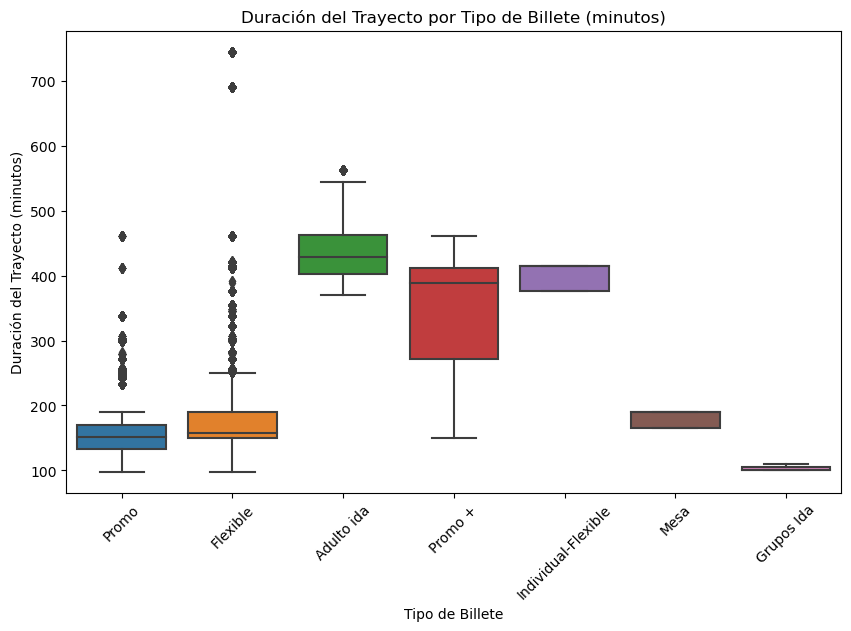

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fare', y='travel_duration_minutes')
plt.title('Duración del Trayecto por Tipo de Billete (minutos)')
plt.xlabel('Tipo de Billete')
plt.ylabel('Duración del Trayecto (minutos)')
plt.xticks(rotation=45)
plt.show()

Teniendo en cuenta que el billete Adulto ida, en el tren Regional es el más económico, pero el que más duración en trayecto tiene. Vamos a identificar en que horario, origen y destino están asociados con dicho billete. 

### Separamos en columnas los datos de la variable start_date y end_date

Vamos a separar las fechas y las horas de las columnas start_date y end_date, para obtener datos más claros.

In [44]:
# Convertir 'start_date' a formato de fecha y hora
data['start_date'] = pd.to_datetime(data['start_date'])
# Crear nuevas columnas para la fecha y la hora de inicio
data['start_date_date'] = data['start_date'].dt.date
data['start_date_time'] = data['start_date'].dt.time

# Convertir 'end_date' a formato de fecha y hora
data['end_date'] = pd.to_datetime(data['end_date'])
# Crear nuevas columnas para la fecha y la hora de finalización
data['end_date_date'] = data['end_date'].dt.date
data['end_date_time'] = data['end_date'].dt.time

# Mostrar las nuevas columnas de fecha y hora
print(data[['start_date_date', 'start_date_time', 'end_date_date', 'end_date_time']])


       start_date_date start_date_time end_date_date end_date_time
0           2019-05-19        07:05:00    2019-05-19      09:50:00
1           2019-05-28        11:00:00    2019-05-28      13:45:00
2           2019-06-25        14:00:00    2019-06-25      17:10:00
3           2019-05-07        07:15:00    2019-05-07      16:37:00
4           2019-05-05        08:30:00    2019-05-05      11:14:00
...                ...             ...           ...           ...
499995      2019-05-31        21:25:00    2019-06-01      00:10:00
499996      2019-05-28        13:00:00    2019-05-28      15:40:00
499997      2019-05-22        15:00:00    2019-05-22      17:30:00
499998      2019-05-05        18:40:00    2019-05-05      20:20:00
499999      2019-05-12        09:03:00    2019-05-12      18:07:00

[500000 rows x 4 columns]


### Analizamos en detalle el billete más económico Adulto Ida

In [45]:
# Filtrar el DataFrame para el tipo de billete 'Adulto ida'
adulto_ida_data = data[data['fare_Adulto ida'] == True]

# Encontrar los billetes más económicos
cheapest_tickets = adulto_ida_data.groupby('start_date_time')['price'].min().nsmallest(5).index

# Obtener información de los billetes más económicos: horarios, origen y destino
info_cheapest_tickets = adulto_ida_data[adulto_ida_data['start_date_time'].isin(cheapest_tickets)][['start_date_time','end_date_time', 'origin', 'destination']].drop_duplicates()

print("Horarios más comunes de salida para los billetes más económicos de Adulto ida con su origen y destino:")
print(info_cheapest_tickets)



Horarios más comunes de salida para los billetes más económicos de Adulto ida con su origen y destino:
    start_date_time end_date_time    origin destination
54         06:08:00      12:55:00    MADRID    VALENCIA
80         09:50:00      17:28:00  VALENCIA      MADRID
187        06:38:00      14:20:00  VALENCIA      MADRID
253        06:38:00      13:37:00  VALENCIA      MADRID
351        09:50:00      16:58:00  VALENCIA      MADRID
652        06:20:00      12:55:00    MADRID    VALENCIA
700        08:00:00      14:10:00    MADRID    VALENCIA


**Observamos** que los horarios más comunes son a primera hora de la mañana de 6h a 9h. Y los origenes y destinos es Madrid y Valencia.

### Vamos ha hacer un recuento para ver que pasa con las otras ciudades 

In [46]:
# Suponiendo que 'data' es tu DataFrame y tienes la columna 'fare_Adulto ida'

# Filtrar los datos para los billetes 'Adulto ida'
adulto_ida_data = data[data['fare_Adulto ida']]

# Contar los valores únicos de origen y destino
origin_counts = adulto_ida_data['origin'].value_counts()
destination_counts = adulto_ida_data['destination'].value_counts()

print("Recuento de origenes para billetes 'Adulto ida':")
print(origin_counts)

print("\nRecuento de destinos para billetes 'Adulto ida':")
print(destination_counts)


Recuento de origenes para billetes 'Adulto ida':
origin
MADRID       19090
VALENCIA     14768
BARCELONA     3886
Name: count, dtype: int64

Recuento de destinos para billetes 'Adulto ida':
destination
MADRID       18654
VALENCIA     16203
BARCELONA     2887
Name: count, dtype: int64


**Observación**: Tanto SEVILLA como PONFERRADA, son ciudades que no utilizarn el billete Adulto_Ida. Y Barcelona obtenemos un recuento muy significativo.

### Analizamos en detalle el billete PROMO que es el más vendido

Anteriormente hemos observado que el tipo de billete con más ventas es el PROMO que es el que más vende el tren AVE y tiene un menor tiempo de trayecto.

In [47]:
# Filtrar el DataFrame para el tipo de billete 'Promo'
promo_data = data[data['fare_Promo'] == True]

# Encontrar los billetes más económicos
cheapest_tickets = promo_data.groupby('start_date_time')['price'].min().nsmallest(5).index

# Obtener información de los billetes más económicos: horarios, origen y destino
info_cheapest_tickets = promo_data[promo_data['start_date_time'].isin(cheapest_tickets)][['start_date_time', 'end_date_time', 'origin', 'destination']].drop_duplicates()

print("Horarios más comunes de salida para los billetes más económicos de Promo con su origen y destino:")
print(info_cheapest_tickets)


Horarios más comunes de salida para los billetes más económicos de Promo con su origen y destino:
      start_date_time end_date_time    origin destination
45           11:10:00      13:25:00    MADRID    VALENCIA
55           06:20:00      09:29:00    MADRID   BARCELONA
82           17:48:00      21:58:00    MADRID    VALENCIA
169          21:05:00      23:32:00  VALENCIA      MADRID
170          06:20:00      09:16:00    MADRID     SEVILLA
177          06:20:00      10:36:00  VALENCIA      MADRID
412          15:10:00      16:52:00    MADRID    VALENCIA
692          15:10:00      17:20:00    MADRID    VALENCIA
1016         15:10:00      17:03:00  VALENCIA      MADRID
4053         06:20:00      10:59:00  VALENCIA      MADRID
17003        17:48:00      22:02:00    MADRID    VALENCIA


## Gráfica de distribución del precio por origen

## BoxPlot

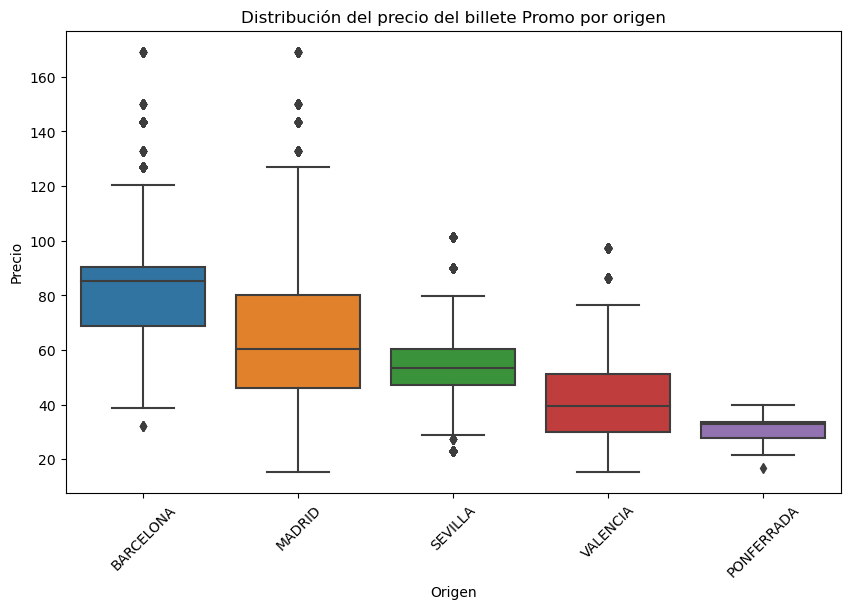

In [48]:

# Filtrar el DataFrame para el billete 'Promo'
promo_data = data[data['fare_Promo'] == True]

# Crear un gráfico de caja para visualizar la distribución del precio por origen
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='price', data=promo_data)
plt.xlabel('Origen')
plt.ylabel('Precio')
plt.title('Distribución del precio del billete Promo por origen')
plt.xticks(rotation=45)
plt.show()

Viendo estos datos, me surge una duda, quiero saber cómo varia el precio según el origen y su destino del billete Promo que es el más vendido.

## gráfico de barras para visualizar la variación del precio por origen y destino

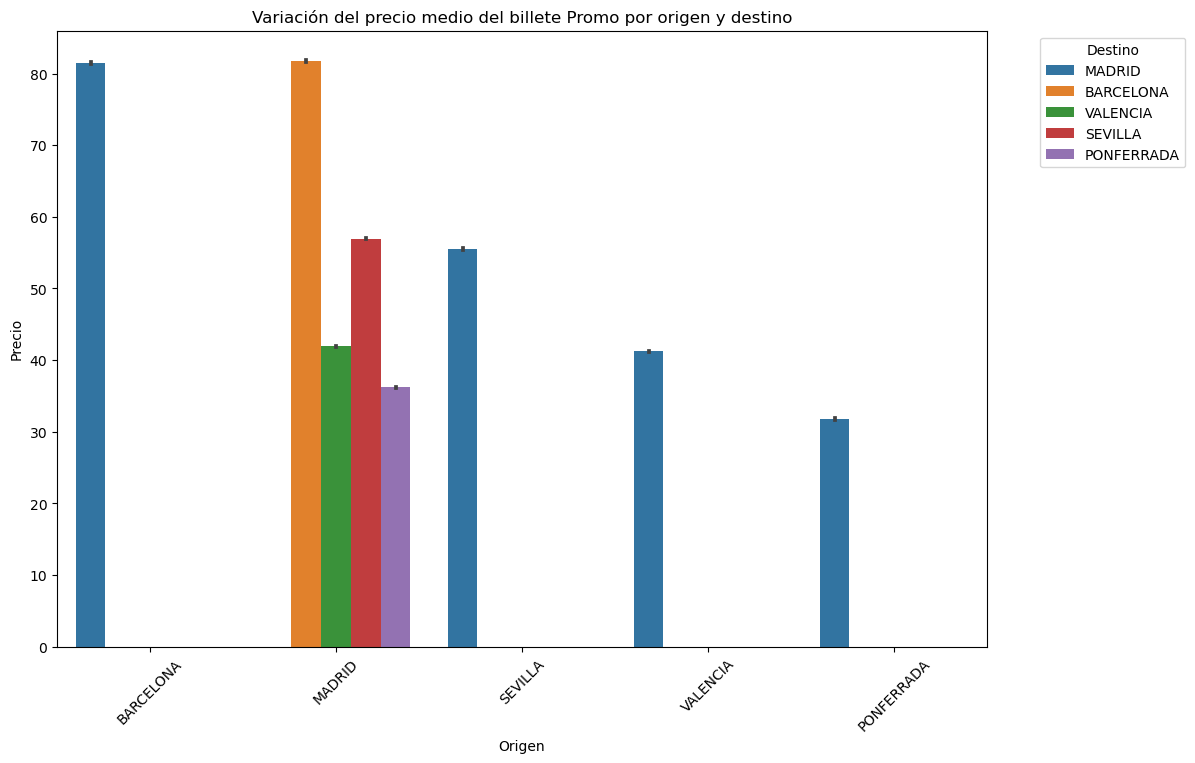

In [49]:
promo_data = data[data['fare_Promo'] == True]

plt.figure(figsize=(12, 8))
sns.barplot(x='origin', y='price', hue='destination', data=promo_data)
plt.xlabel('Origen')
plt.ylabel('Precio')
plt.title('Variación del precio medio del billete Promo por origen y destino')
plt.xticks(rotation=45)
plt.legend(title='Destino', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Observamos** que con el billete Promo, Barcelona Madrid la media son 80€, y viceversa igual, en cambio, para el resto de ciudades es mucho más económico. Pero eso no signifca que no pueda crear un modelo de predicción para poder saber cuándo es el billete más economico para ir de barcelona a Madrid. A continuación realizaremos una simulación:

In [50]:
# Filtrar el DataFrame para el tipo de billete 'Promo'
promo_data = data[data['fare_Promo'] == True]

# Encontrar el billete más caro
most_expensive_ticket = promo_data.loc[promo_data['price'].idxmax()]

# Encontrar el billete más económico
cheapest_ticket = promo_data.loc[promo_data['price'].idxmin()]

print("Billete más caro:")
print(most_expensive_ticket[['start_date_time', 'end_date_time', 'origin', 'destination', 'price']])

print("\nBillete más económico:")
print(cheapest_ticket[['start_date_time', 'end_date_time', 'origin', 'destination', 'price']])


Billete más caro:
start_date_time     16:25:00
end_date_time       18:55:00
origin             BARCELONA
destination           MADRID
price                  169.2
Name: 1120, dtype: object

Billete más económico:
start_date_time    17:48:00
end_date_time      21:58:00
origin               MADRID
destination        VALENCIA
price                 15.45
Name: 109746, dtype: object


Si quisieramos saber cuál es el billete más económico con la duración de trayecto más corta entre Madrid y Barcelona, realizariamos lo siguiente: 

In [59]:
# Crear columna 'travel_duration' con la diferencia entre las fechas de inicio y fin en segundos
data['travel_duration'] = (data['end_date'] - data['start_date']).dt.total_seconds()

Filtramos los datos para encontrar aquellos que coinciden tanto con el origen como con el destino proporcionados.

In [60]:
# Filtrar los datos para encontrar aquellos que coinciden con el origen y destino proporcionados
filtered_data = data[(data['origin'] == 'BARCELONA') & (data['destination'] == 'MADRID')]

Buscamos el billete más económico dentro de los datos filtrados.

In [61]:
# Convertir la duración del trayecto de segundos a horas
filtered_data['travel_duration_hours'] = filtered_data['travel_duration'] / 3600

C:\Users\vsanc\AppData\Local\Temp\ipykernel_11472\1072337219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['travel_duration_hours'] = filtered_data['travel_duration'] / 3600


In [62]:
# Buscar el billete más económico dentro de los datos filtrados
cheapest_ticket = filtered_data.loc[filtered_data['price'].idxmin()]

#Esto se logra encontrando el índice del billete con el precio más bajo usando filtered_data['price'].idxmin() 
#Luego, se utiliza ese índice para localizar toda la fila correspondiente al billete más económico en el DataFrame original.

Buscamos el trayecto más corto en duración dentro de los datos filtrados

In [64]:
shortest_duration = filtered_data.loc[filtered_data['travel_duration'].idxmin()]
#para encontrar el índice del trayecto con la duración más corta y se utiliza este índice para localizar la fila correspondiente en el DataFrame original.

Y vemos los resultados:

In [66]:
print("Billete más económico:")
print(cheapest_ticket[['start_date_time', 'end_date_time', 'train_type', 'price']])

print("\nTrayecto más corto en duración:")
print(shortest_duration[['start_date_time', 'end_date_time', 'train_type', 'travel_duration_hours', 'price']])


Billete más económico:
start_date_time    12:50:00
end_date_time      15:45:00
train_type          AVE-TGV
price                  32.3
Name: 199028, dtype: object

Trayecto más corto en duración:
start_date_time          18:25:00
end_date_time            20:55:00
train_type                    AVE
travel_duration_hours         2.5
price                       82.35
Name: 5, dtype: object


*Conclusiones* El billete más económico tiene una duración de trayecto más larga 2:55 y es al medio día. En cambio si queremos el billete con duración más corta 2:30h el precio casi se triplica.